In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows',None)

In [145]:
import sklearn
print(sklearn.__version__)

1.5.1


In [146]:
df=pd.read_csv("emp_promotion (1).csv")
#print('shape of train data {}'.format(df.shape))
#df


In [182]:
df.head(10)




,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,3,1,35,5.0,8.0,1,0,49,0
1,4,2,1,30,5.0,4.0,0,0,60,0
2,7,2,1,34,3.0,7.0,0,0,50,0
3,7,2,2,39,1.0,10.0,0,0,50,0
4,8,2,1,45,3.0,2.0,0,0,73,0
5,0,2,2,31,3.0,7.0,0,0,85,0
6,4,2,1,31,3.0,5.0,0,0,59,0
7,4,3,1,33,3.0,6.0,0,0,63,0
8,0,2,1,28,4.0,5.0,0,0,83,0
9,7,3,1,32,5.0,5.0,1,0,54,0


In [148]:
df.tail()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


<Axes: xlabel='is_promoted', ylabel='count'>

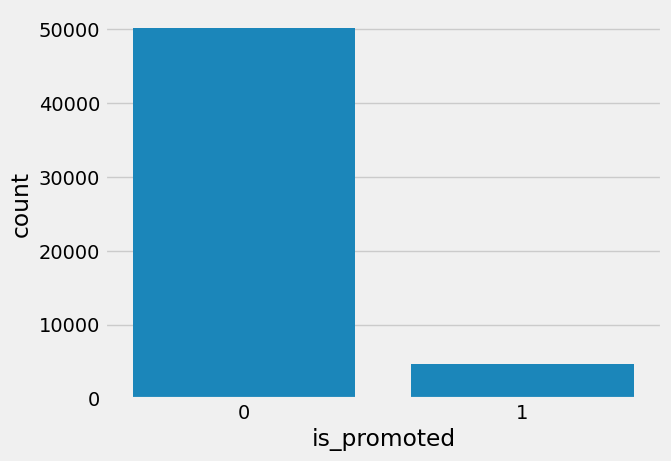

In [149]:

sns.countplot(x='is_promoted',data=df)



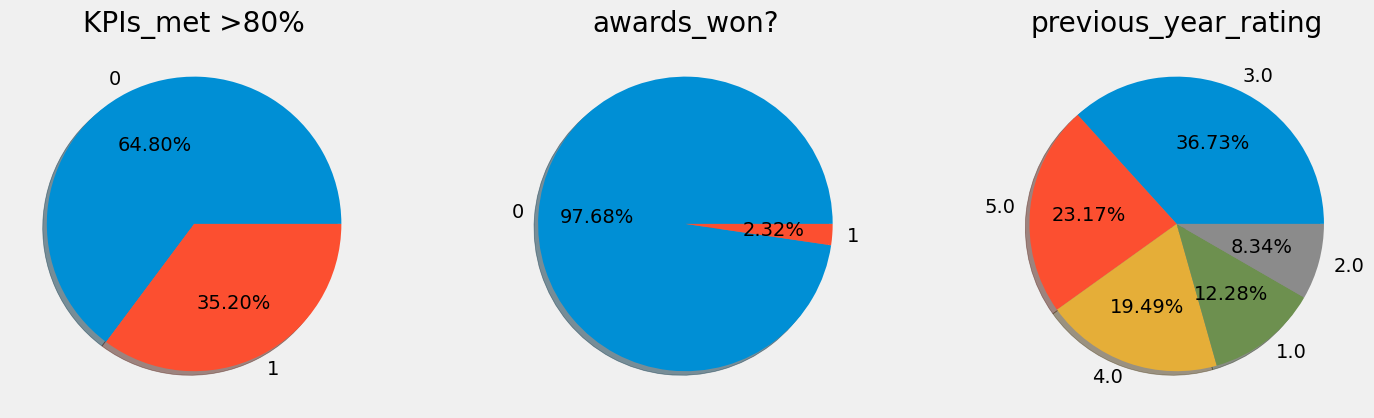

In [150]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.axis('off')
plt.title('KPIs_met >80%')
df['KPIs_met >80%'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.subplot(232)
plt.axis('off')
plt.title('awards_won?')
df['awards_won?'].value_counts().plot(kind='pie',shadow='True',autopct = '%.2f%%')
plt.subplot(233)
plt.axis('off')
plt.title('previous_year_rating')
df['previous_year_rating'].value_counts().plot(kind='pie',shadow='True',autopct = '%.2f%%')
plt.show()

<Axes: ylabel='avg_training_score'>

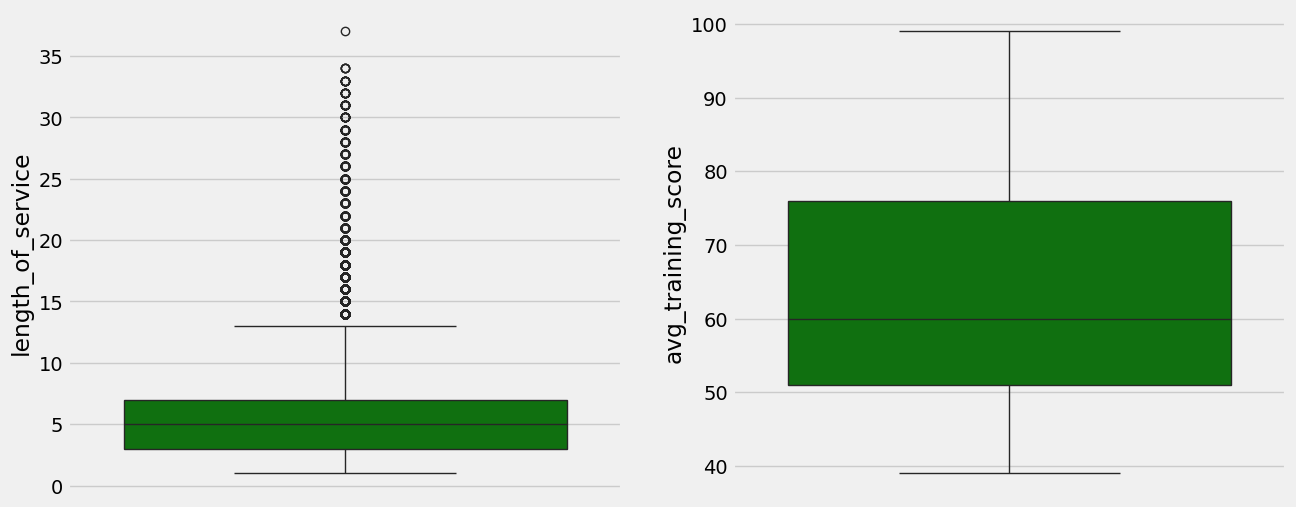

In [151]:
#length of services columns has outliers
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(df['length_of_service'],color='g')
plt.subplot(1,2,2)
sns.boxplot(df['avg_training_score'],color='g')


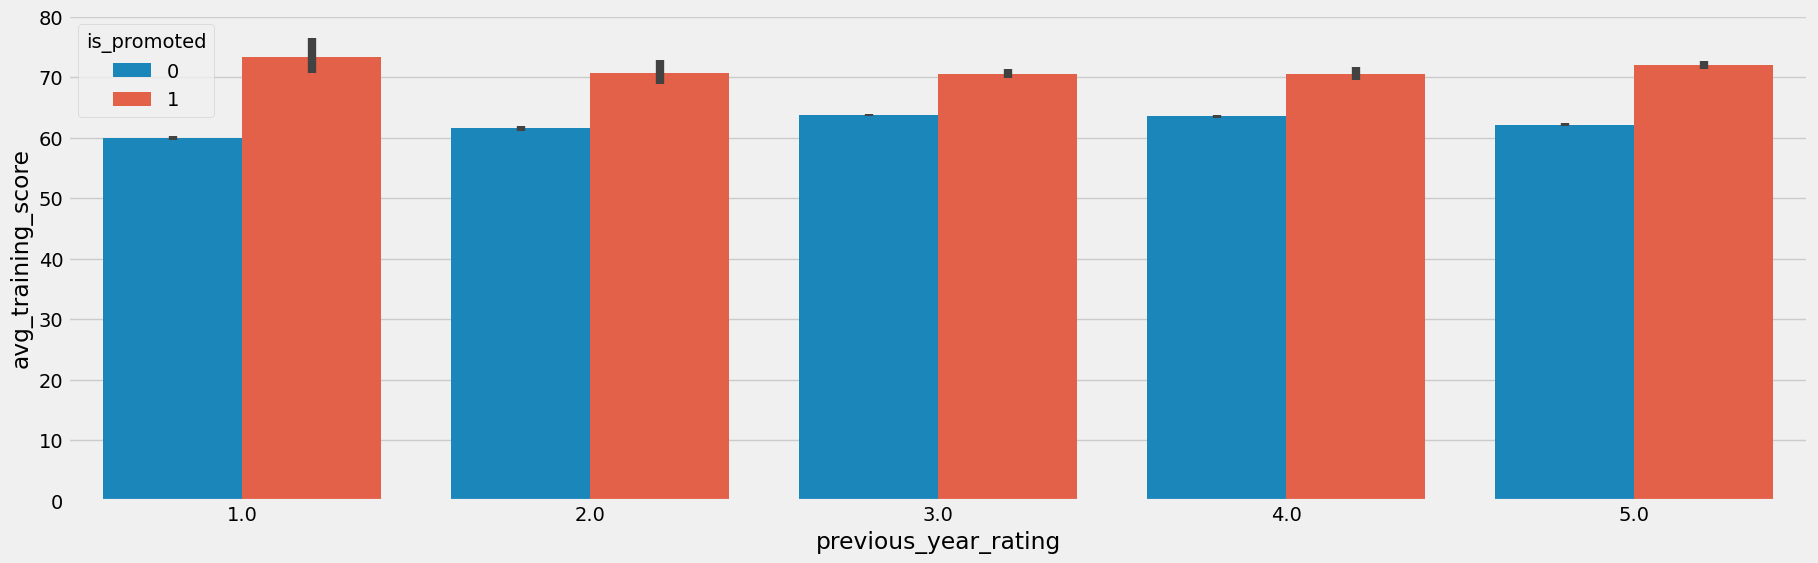

In [152]:

plt.figure(figsize=(20,6))
# Use 'x' and 'y' to specify the data for the bar plot
sns.barplot(x='previous_year_rating', y='avg_training_score', hue='is_promoted', data=df)
plt.show()

In [153]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [154]:
df=df.drop(['employee_id','region','recruitment_channel'],axis=1)

In [155]:
df.isnull().sum()

department                 0
education               2409
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [156]:
#replacing nan with mode
print(df['education'].value_counts())
df['education'] = df['education'].fillna(df['education'].mode()[0])

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64


In [157]:
#replacing nan with mode
print(df['previous_year_rating'].value_counts())
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64


In [158]:
negative=df[(df['KPIs_met >80%']==0)& (df['awards_won?']==0) & (df['previous_year_rating']==1.0) & (df['is_promoted']==1) & (df['avg_training_score']<60)]
negative

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1


In [159]:
#removing negative data
df.drop(index=[31860,51374],inplace=True)

In [160]:
#handling outliers
q1 = np.quantile(df['length_of_service'],0.25)
q3 = np.quantile(df['length_of_service'],0.75)
IQR = q3-q1
upperBound = (1.5*IQR)+q3
lowerbound = (1.5*IQR)-q1
print('q1 :',q1)
print('q3 :',q3)
print('IQR :',IQR)
print('upper Bound :',upperBound)
print('Lower Bound :',lowerbound)
print('skewed data :',len(df[df['length_of_service']>upperBound]))

q1 : 3.0
q3 : 7.0
IQR : 4.0
upper Bound : 13.0
Lower Bound : 3.0
skewed data : 3489


In [161]:
pd.crosstab([df['length_of_service']>upperBound],df['is_promoted'])

is_promoted,0,1
length_of_service,,
False,46885,4432
True,3255,234


In [162]:
#capping
df['length_of_service']=[upperBound if x>upperBound else x for x in df['length_of_service']]

In [163]:
# feature mapping is done on education column
df['education']=df['education'].replace(("Below Secondary","Bachelor's","Master's & above"),(1,2,3))

In [164]:
lb = LabelEncoder()
df['department']=lb.fit_transform(df['department'])

In [165]:
# splitting data and resampling it
x = df.drop('is_promoted',axis=1)
y = df['is_promoted']
print (x.shape)
print(y.shape)

(54806, 10)
(54806,)


In [166]:
from imblearn.over_sampling import SMOTE



In [167]:
df=df.drop(['gender'],axis=1)

In [168]:
x = df.drop('is_promoted',axis=1)
x = pd.get_dummies(x)
sm = SMOTE()
x = x.fillna(x.mean())
y = df['is_promoted']
x_resample, y_resample = sm.fit_resample(x,y)
x.columns

Index(['department', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score'],
      dtype='object')

In [181]:
x.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,3,1,35,5.0,8.0,1,0,49
1,4,2,1,30,5.0,4.0,0,0,60
2,7,2,1,34,3.0,7.0,0,0,50
3,7,2,2,39,1.0,10.0,0,0,50
4,8,2,1,45,3.0,2.0,0,0,73


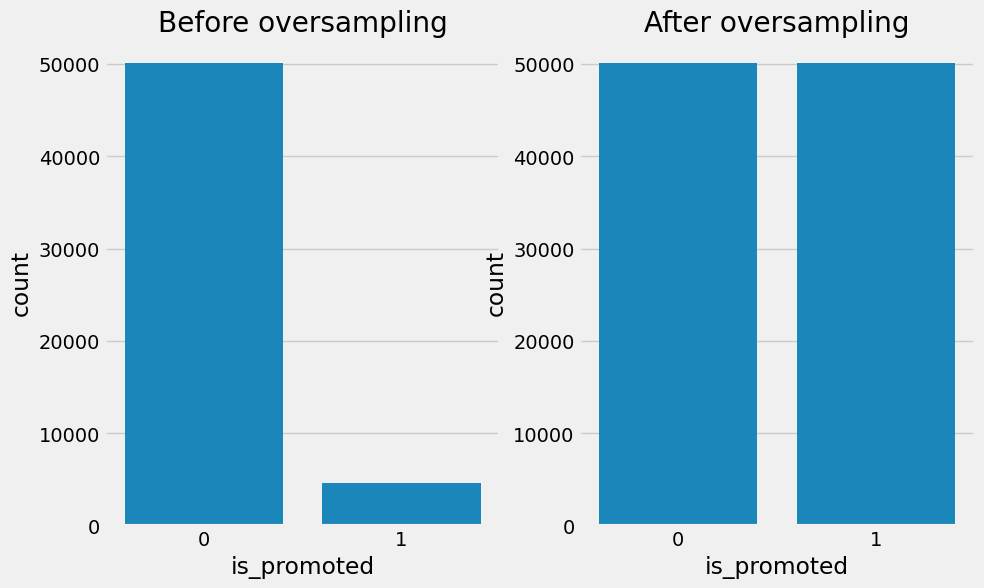

In [169]:

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x=y) # Changed to y since x_resample is a DataFrame
plt.title('Before oversampling')
plt.subplot(1,2,2)
sns.countplot(x=y_resample)
plt.title('After oversampling')
plt.show()

In [170]:
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3,random_state=(10))

In [171]:
print('shape of x_train {}'.format(x_train.shape))
print('shape of y_train {}'.format(y_train.shape))
print('shape of x_test {}'.format(x_test.shape))
print('shape of y_test {}'.format(y_test.shape))

shape of x_train (70196, 9)
shape of y_train (70196,)
shape of x_test (30084, 9)
shape of y_test (30084,)


In [172]:
def decisionTree(x_train,x_test,y_train,y_test):
  dt=DecisionTreeClassifier()
  dt.fit(x_train,y_train)
  y_pred = dt.predict(x_test)
  print('***DecisionTreeClassifier***')
  print('confusion_matrix')
  print(confusion_matrix(y_test,y_pred))
  print('Classification report')
  print(classification_report(y_test,y_pred))

In [173]:
 def randomforest(x_train,x_test,y_train,y_test):
  rf = RandomForestClassifier()
  rf.fit(x_train,y_train)
  y_pred= rf.predict(x_test)
  print('***RandomForestClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(y_test,y_pred))
  print('Classification report')
  print(classification_report(y_test,y_pred))

In [174]:
def KNN(x_train,x_test,y_train,y_test):
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)
  y_pred= knn.predict(x_test)
  print('***KNeighborsClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(y_test,y_pred))
  print('Classification report')
  print(classification_report(y_test,y_pred))

In [175]:
def xgboost(x_train,x_test,y_train,y_test):
  xg = GradientBoostingClassifier()
  xg.fit(x_train,y_train)
  y_pred= xg.predict(x_test)
  print('***GradientBoostingClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(y_test,y_pred))
  print('Classification report')
  print(classification_report(y_test,y_pred))

In [176]:
def compareModel(x_train,x_test,y_train,y_test):
    # Call your machine learning functions here, e.g.,
    decisionTree(x_train, x_test, y_train, y_test)
    randomforest(x_train, x_test, y_train, y_test)
    KNN(x_train, x_test, y_train, y_test)
    xgboost(x_train, x_test, y_train, y_test)


In [177]:
compareModel(x_train,x_test,y_train,y_test)

***DecisionTreeClassifier***
confusion_matrix
[[13877  1188]
 [  867 14152]]
Classification report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     15065
           1       0.92      0.94      0.93     15019

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084

***RandomForestClassifier***
Confusion matrix
[[14169   896]
 [  776 14243]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     15065
           1       0.94      0.95      0.94     15019

    accuracy                           0.94     30084
   macro avg       0.94      0.94      0.94     30084
weighted avg       0.94      0.94      0.94     30084

***KNeighborsClassifier***
Confusion matrix
[[12250  2815]
 [  513 14506]]
Classification report
              precision    recall  f1-score   suppo

In [178]:
#Random forest model is selected
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [179]:
cv = cross_val_score(rf,x_resample,y_resample,cv=5)
np.mean(cv)

np.float64(0.946230554447547)

In [180]:
pickle.dump(rf,open('model.pkl','wb'))